In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data')
int_dir = os.path.join(data_dir,'analysis','interim')
pro_dir = os.path.join(data_dir,'analysis','processed')
fig_dir = os.path.join(os.pardir,os.pardir,'reports','relation_melting','figures')

src_dir = os.path.join(proj_dir,'src')
sys.path.append(src_dir)

from tools.log_progress import log_progress

from eofs.xarray import Eof
from eofs.examples import example_data_path

In [3]:
from dask.distributed import Client
C = Client()
C

Client Scheduler: tcp://127.0.0.1:49039 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 16 Cores: 16 Memory: 101.38 GB


In [3]:
grid_path = os.path.join(int_dir,'grd2_dV.nc')
m_path = os.path.join(int_dir,'m2.nc')
ustar_path = os.path.join(int_dir,'ustar2.nc')
Tfr_path = os.path.join(int_dir,'Tfr2.nc')

grd = xr.open_dataset(grid_path)
m = xr.open_mfdataset(m_path)
Tfr = xr.open_mfdataset(Tfr_path)
ustar = xr.open_mfdataset(ustar_path)

In [44]:
m = m - m.mean('ocean_time')
grd['dA'] = (grd.pm*grd.pn)**-1
mask = (grd.mask_rho == 1) & (grd.zice < 0)
weights = grd.dA.where(mask)/grd.dA.where(mask).sum()

In [48]:
m.load()

<xarray.DataArray 'm' (ocean_time: 73, eta_rho: 2650, xi_rho: 3150)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]],

       [[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]],

       ...,

       [[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]],

       [[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2014-05-11T12:00:00 ...
    x_rho       (eta_rho, xi_rho) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    y_rho       (eta_rho, xi_rho) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Dimensions without coordinates: eta_rho, xi_rho

In [49]:
solver = Eof(m,weights=weights)

<IPython.core.display.Javascript object>


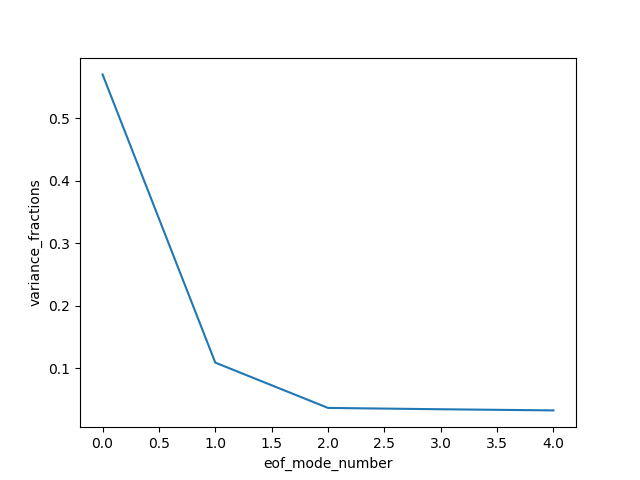

In [71]:
variance_fractions = solver.varianceFraction(neigs=5)
plt.close()
variance_fractions.plot()

In [72]:
eofs = solver.eofs(neofs=3)
eofs_cov = solver.eofsAsCovariance(neofs=3)
eofs_corr = solver.eofsAsCorrelation(neofs=3)

In [108]:
pcs = solver.pcs(pcscaling=1,npcs=3)

In [97]:
print('EOF Mode {} ({:.2f})'.format(i,variance_fractions[i]))

TypeError: unsupported format string passed to DataArray.__format__

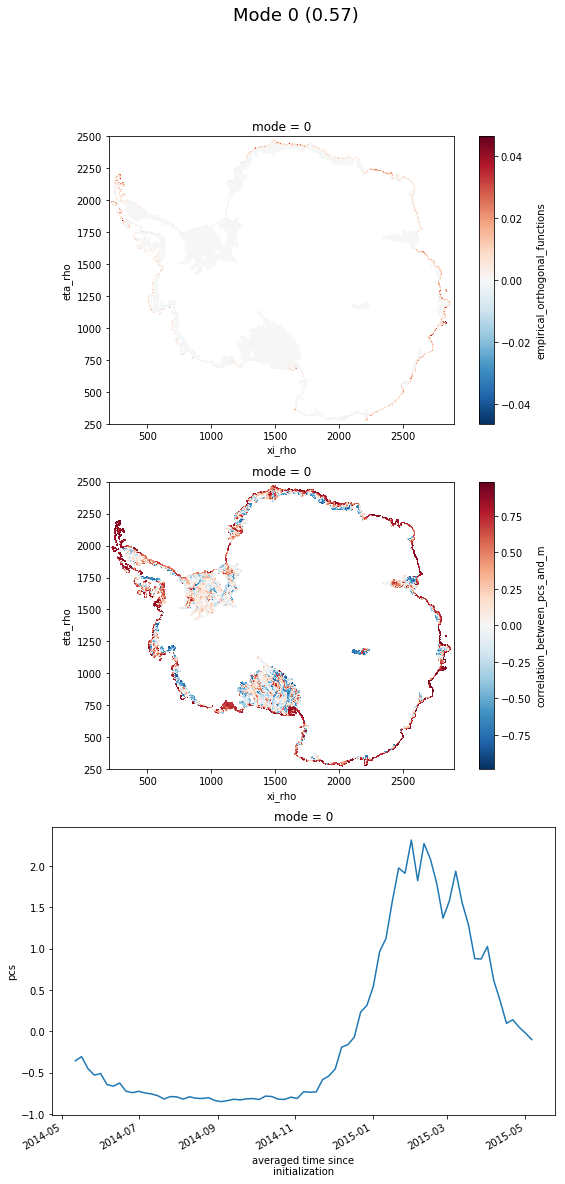

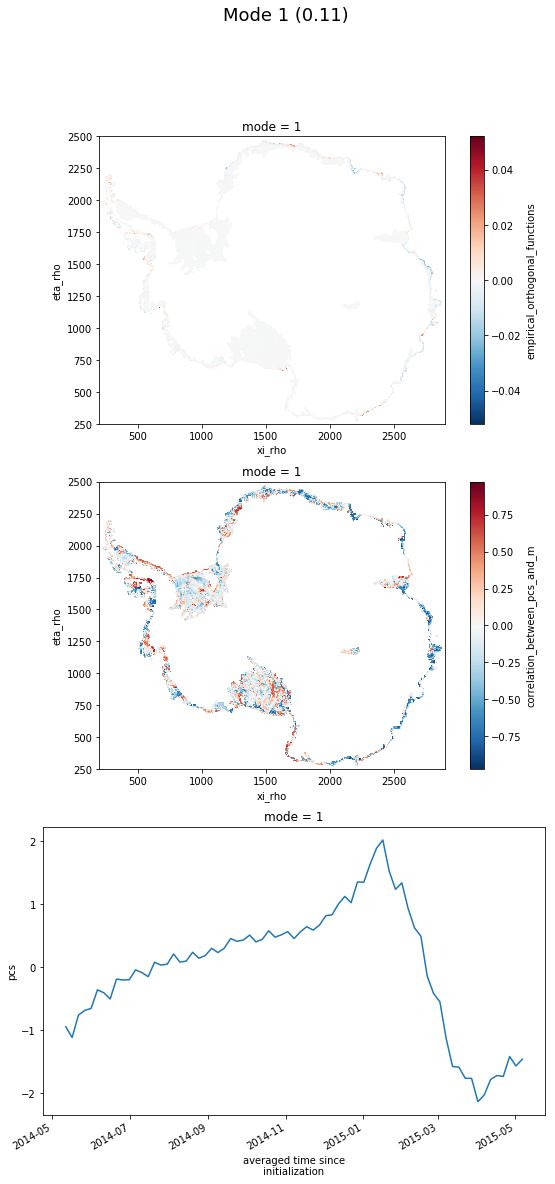

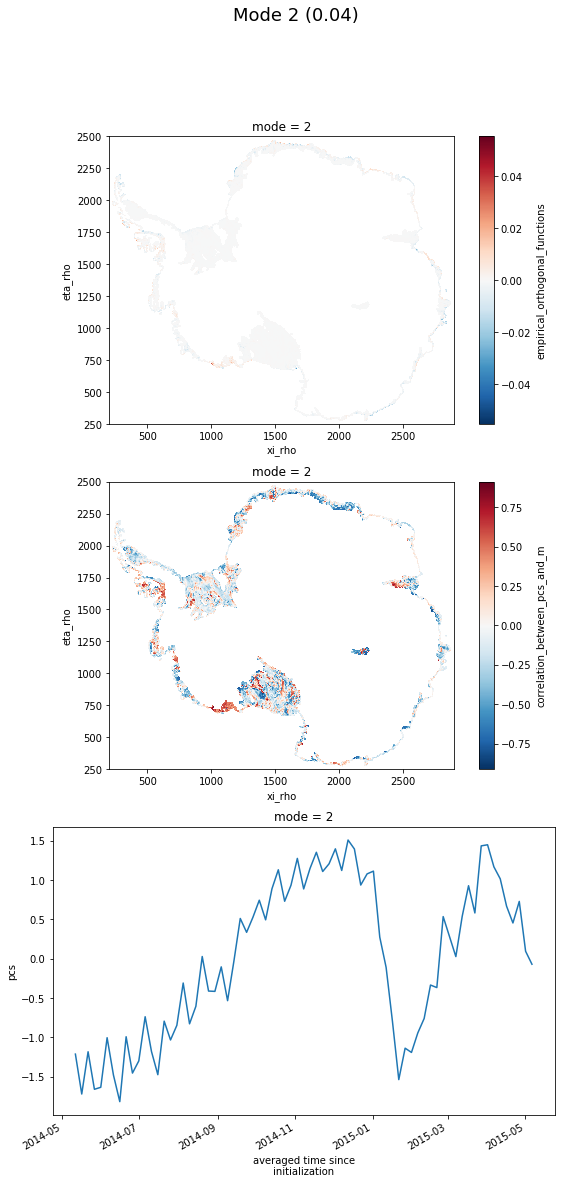

In [111]:
%matplotlib inline
for i in [0,1,2]:
    plt.close()
    fig, axes = plt.subplots(3,figsize=(9,18))
    fig.suptitle('Mode {} ({:.2f})'.format(i,variance_fractions[i].values),fontsize=18)
    ax1,ax2,ax3 = axes.flatten()
    eofs[i].plot(ax=ax1)
    eofs_corr[i].plot(ax=ax2)
    pcs[:,i].plot(ax=ax3)
    for ax in [ax1,ax2]:
        ax.set_aspect('equal')
        ax.grid(False)
        ax.set_ylim([250,2500])
        ax.set_xlim([200,2900])
    #plt.tight_layout()
    plt.savefig(os.path.join(fig_dir,'EOF_'+str(i)+'.png'),bbox_inches = "tight")
    plt.show()      

In [ ]:
from eofs.multivariate.standard import MultivariateEof
msolver = Multi

In [84]:
pcs

<xarray.DataArray 'pcs' (ocean_time: 73, mode: 3)>
array([[-1.540601e-11, -1.792392e-11, -1.344617e-11],
       [-1.324886e-11, -2.118739e-11, -1.906934e-11],
       [-1.956390e-11, -1.440768e-11, -1.311398e-11],
       ...,
       [ 2.208304e-12, -2.692486e-11,  8.068829e-12],
       [-8.923352e-13, -2.977929e-11,  1.044007e-12],
       [-4.332523e-12, -2.773633e-11, -7.831873e-13]], dtype=float32)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2014-05-11T12:00:00 ...
  * mode        (mode) int64 0 1 2

<IPython.core.display.Javascript object>


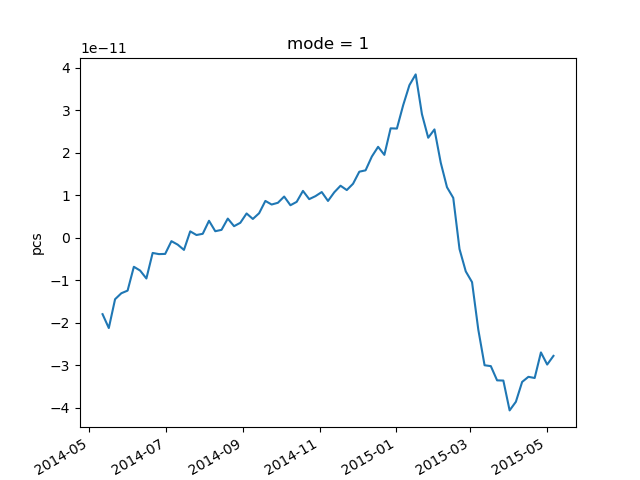

In [86]:
plt.close()
pcs[:,1].plot()
plt.show()

<IPython.core.display.Javascript object>


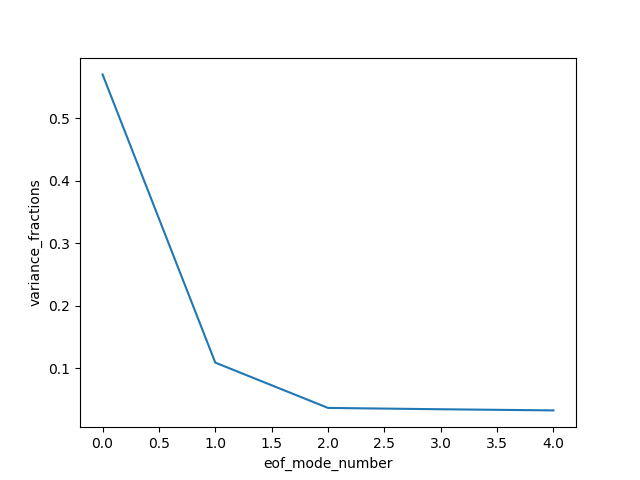

In [33]:
varFrac[0]

<xarray.DataArray 'variance_fractions' ()>
array(0.69646, dtype=float32)
Coordinates:
    mode     int64 0
Attributes:
    long_name:  variance_fractions